# Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results

In [1]:
from scipy.stats import t
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import norm
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [7]:
#sample
mean = 50
std = 5
n = 30

alpha = 0.05

#bondary
t_crit = t.ppf(1-alpha/2, n-1)

#margin error
margin_error = t_crit * std/math.sqrt(n)

lower_bound = mean - margin_error
upper_bound = mean + margin_error

print("95% confidence interval for a sample data with mean of 50, standard deviation of 5 and sample size of 30: \n",(lower_bound,upper_bound))

95% confidence interval for a sample data with mean of 50, standard deviation of 5 and sample size of 30: 
 (48.1329693162095, 51.8670306837905)


# Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.


In [28]:
Ho = "The distribution of colors in the sample matches the expected distribution."
Ha = "The distribution of colors in the sample does not match the expected distribution."

# Observed frequencies of colors in the bag
observed_freq = np.array([25, 15, 20, 12, 10, 18])  # Blue, Orange, Green, Yellow, Red, Brown

# Expected frequencies based on the given distribution
expected_freq = np.array([0.2, 0.2, 0.2, 0.1, 0.1, 0.2]) * np.sum(observed_freq)

# Perform the chi-square test
chi2_stat, p_value = chisquare(observed_freq, expected_freq)

#decision bondary
chi2_crit = chi2.ppf( 1-0.05/2, np.sum(observed_freq)-1)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("Chi2 critical:", chi2_crit)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis.",Ha)
else:
    print("Fail to reject null hypothesis.",Ho)

Chi-square statistic: 3.1
Chi2 critical: 128.4219886438403
p-value: 0.6845720146699825
Fail to reject null hypothesis. The distribution of colors in the sample matches the expected distribution.


# Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data:


In [37]:
data = pd.DataFrame( {"Groupe A": [20,10,15], "Groupe B" :[15,25,20]}, index=["Outcome 1","Outcome 2","Outcome 3"] )
data

,Groupe A,Groupe B
Outcome 1,20,15
Outcome 2,10,25
Outcome 3,15,20


In [29]:
Ho = "The outcomes are independent of the groups."
Ha = "The outcomes are Dependent on the groups."
    
# Create a contingency table from the DataFrame
contingency_table = data.values

# Calculate the chi-square statistic, p-value, degrees of freedom, and expected frequencies
chisq, p, dof, expected = chi2_contingency(contingency_table)

#bondary
chi2_crit = chi2.ppf(1-0.05/2, dof)

print("Chi-square statistic:", chisq)
print("Decision bondary:", chi2_crit)
print("P value: ",p)
print("Degrees of freedom:", dof)

if chisq > chi2_crit :
    print( "Reject Ho.", Ha )
else:
    print( "Fail to reject Ho.", Ho)

Chi-square statistic: 13.393665158371041
Decision bondary: 7.377758908227871
P value:  0.0012348168997745915
Degrees of freedom: 2
Reject Ho. The outcomes are Dependent on the groups.


# Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.


We are giving confidence interval for a proportion, so we will use Z-test.

In [69]:
#sample size 
n = 500

#smoker
x = 60

#proportion of smoker
p = x/n

#alpha
alpha = 0.05

# Standard error of proportion
se = math.sqrt((p*(1-p))/n)

#margin error for a two tailed 95% confidence interval 
margin_error = norm.ppf(1-alpha/2)*se

lower_bound = p - margin_error
upper_bound = p + margin_error

print(f"95% confidence interval for proportion of smoker\n ({lower_bound*100:.2f}%, {upper_bound*100:.2f}%)" )


95% confidence interval for proportion of smoker
 (9.15%, 14.85%)


# Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.


In [73]:
#sample mean
mean = 75
#sample standard deviation
std = 12
#sample size
n = 30
#alpha
alpha = 0.1
#standard error
se = std/ math.sqrt(n)
#margin error
me = t.ppf(1-alpha/2, n-1) * se

lower_bound = mean - me
upper_bound = mean + me

print(f"90% confidence interval for a mean 75 and standard deviation of 12\n ({lower_bound:.2f},{upper_bound:.2f})")

90% confidence interval for a mean 75 and standard deviation of 12
 (71.28,78.72)


# Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.


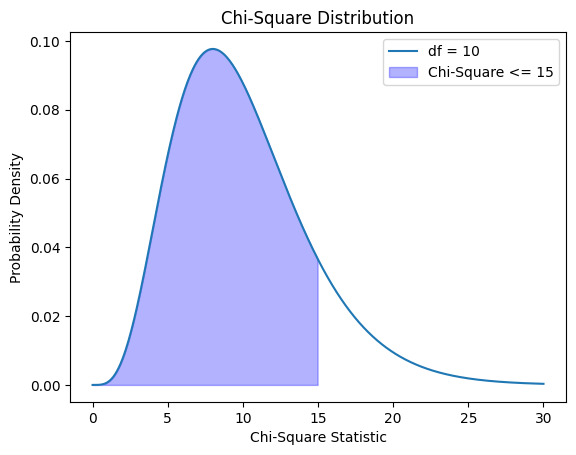

In [75]:
# Degrees of freedom
df = 10

# Generate x values for the plot
x = np.linspace(0, 30, 500)

# Calculate the chi-square probability density function
chi2_pdf = stats.chi2.pdf(x, df)

# Plot the chi-square distribution
plt.plot(x, chi2_pdf, label=f"df = {df}")
plt.fill_between(x, chi2_pdf, where=(x >= 0) & (x <= 15), color='blue', alpha=0.3, label="Chi-Square <= 15")

# Add labels and title
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density')
plt.title('Chi-Square Distribution')
plt.legend()

# Show the plot
plt.show()


# Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.


In [85]:
#sample size
n = 1000
#people who prefer coke
x = 520
#proportion of people that prefer coke
p = x/n
#alpha
alpha = 0.01

#standard error for a proportion
se = math.sqrt( p*(1-p)/n )
#margin error
me = norm.ppf( 1-alpha/2 )*se
#CI
lower_bound = p - me
upper_bound = p + me
  
print(f"99% confidence interval for true proportion of people in population who prefer Coke\n({lower_bound*100:.2f}%,{upper_bound*100:.2f}%)")

99% confidence interval for true proportion of people in population who prefer Coke
(47.93%,56.07%)


# Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.


first method

In [24]:
Ho = "The coin is fair"
Ha = "The coin is unfair"

#sample size
n = 100
#number of times tails apear
x = 45
#alpha
alpha = 0.05
#decision bondary
chi2_crit = chi2.ppf(1-alpha, n-1)
#chi2 stat
chi2_stat = (45-50)**2/50 + (55-50)**2/50

# Print the results
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"Chi2 critical: {chi2_crit:.2f}")
if chi2_val > chi2_crit:
    print("Reject Ho.",Ha)
else:
    print("Fail to reject Ho.",Ho)

Chi-square statistic: 1.00
Chi2 critical: 123.23
Fail to reject Ho. The coin is fair


second method

In [25]:
Ho = "The coin is fair"
Ha = "The coin is unfair"

# Observed frequencies of heads and tails
observed_freq = np.array([55, 45])

# Expected frequencies based on a fair coin
expected_freq = np.array([50, 50])

# Perform the chi-square goodness of fit test
chi2_stat, p_value = chisquare(observed_freq, expected_freq)

# Print the results
print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject Ho.",Ha)
else:
    print("Fail to reject Ho.",Ho)


Chi-square statistic: 1.00
P-value: 0.3173
Fail to reject Ho. The coin is fair


# Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis. Use a significance level of 0.05.


In [2]:
data = pd.DataFrame( { "Lung Cancer: Yes": [60,30], "Lung Cancer: No":[140,170] } , index = ["Smoker" ,"Non-smoker"] )
data

,Lung Cancer: Yes,Lung Cancer: No
Smoker,60,140
Non-smoker,30,170


In [6]:
Ho = "Smoking status and lung cancer are independent"
Ha = "Smoking status and lung cancer are dependent"

#alpha
alpha = 0.05

#contigency table
cont_table = data.values
#chi2 stats
chi2_stats, p_val, df, expected_freq = chi2_contingency(cont_table)

#bondary decision
chi2_crit = chi2.ppf( 1-alpha, df)

print(f"Chi2 value: {chi2_stats}\nChi2 critic = {chi2_crit}\np-value = {p_val}")
if chi2_stats > chi2_crit:
    print("Reject Ho.",Ha)
else:
    print("Fail to reject Ho.",Ho)


Chi2 value: 12.057347670250895
Chi2 critic = 3.841458820694124
p-value = 0.0005158863863703744
Reject Ho. Smoking status and lung cancer are dependent


# Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin. Use a significance level of 0.01

In [9]:
data = pd.DataFrame( {"Milk Chocolate":[200,225] , "Dark Chocolate": [150,175] , "White Chocolate": [150,100]}, index = ["U.S (n=500)", "U.K (n=500)"] )
data

,Milk Chocolate,Dark Chocolate,White Chocolate
U.S (n=500),200,150,150
U.K (n=500),225,175,100


In [11]:
Ho = "There is no association between chocolate preference and country of origin"
Ha = "There is association between chocolate preference and country of origin"

#alpha
alpha = 0.01
#contingency table
cont_table = data.values
#chi2 stats, pvalue, degree of freedom
chi2_stat, p_val, df, exp = chi2_contingency(cont_table)
#chi2 critical value
chi2_crit = chi2.ppf( 1-alpha,df)

print( f"Chi2 stat = {chi2_stat}\nChi2 critical = {chi2_crit}\np-value = {p_val}")
if chi2_stat > chi2_crit:
    print("Reject Ho.", Ha)
else:
    print("Fail to reject Ho.", Ho)


Chi2 stat = 13.393665158371041
Chi2 critical = 9.21034037197618
p-value = 0.0012348168997745915
Reject Ho. There is association between chocolate preference and country of origin


# Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

In [18]:
Ho = "The population mean is equal to 70"
Ha = "The population mean is different to 70"

#first we assume that the null hypotheses is correct
µ = 70
#sample mean
mean = 72
#sample standard deviation
std = 10
#sample size
n = 30
#alpha
alpha = 0.05

#critical value
t_crit = t.ppf( 1-alpha/2, n-1)
#t statistic
t_stat = (mean-µ)/(std/math.sqrt(n))
#p value
p_val = 2*t.sf(t_stat, n-1)
 
print(f"critical value = {t_crit}\nt value = {t_stat}\np value = {p_val}")
if t_stat > t_crit or t_stat < -t_crit:
    print("Reject Ho.",Ha)
else:
    print("Fail to reject Ho.",Ho)

critical value = 2.045229642132703
t value = 1.0954451150103321
p value = 0.28233623728606977
Fail to reject Ho. The population mean is equal to 70
